In [1]:
import pandas as pd
#insert file_path for the data
file_path = 'C:/Users/anton/Documents/2de_master/Thesis/Code/analysis/Code/Airbnb_Spatiotemporal_Analysis/Paris Airbnb_Spatiotemporal_Analysis/Models/FINAL_BIG_DATASET_PARIS.csv'
data= pd.read_csv(file_path)

date  date
2023  3       134.074731
      4       139.327945
      5       140.713149
      6       144.210528
      7       142.165294
      8       140.649537
      9       151.588202
      10      156.289199
      11      146.016906
      12      149.148372
2024  1       150.931675
      2       152.537056
      3       156.264932
      4       159.532464
      5       161.712589
      6       168.862235
      7       190.407243
      8       194.530491
      9       175.187267
Name: price, dtype: float64


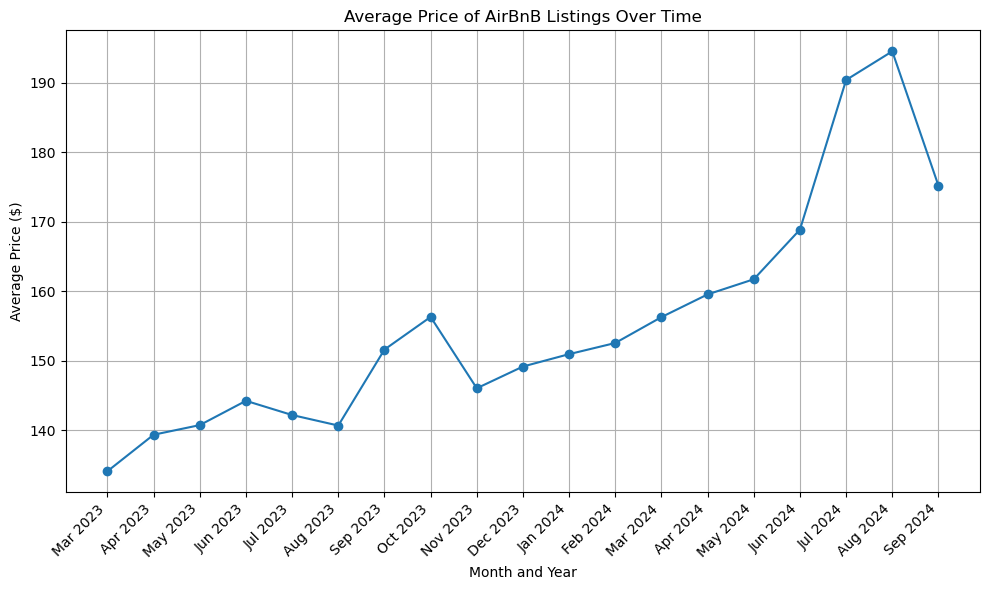

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import seaborn as sb
import numpy as np
import datetime as dt
import csv
from datetime import datetime
%matplotlib inline

# Assuming data is your DataFrame containing the "month", "year", and "price" columns
data['date'] = pd.to_datetime(data['date'])

# Group by both month and year
avg_price = data.groupby([data['date'].dt.year, data['date'].dt.month])['price'].mean()

# Print the average prices
print(avg_price)

# Format index to month and year strings
avg_price.index = [f"{dt.date(year, month, 1).strftime('%b %Y')}" for year, month in avg_price.index]

# Plotting the average price over time
plt.figure(figsize=(10, 6))
plt.plot(avg_price.index, avg_price.values, marker='o', linestyle='-')
plt.xlabel('Month and Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price of AirBnB Listings Over Time')
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()
plt.show()

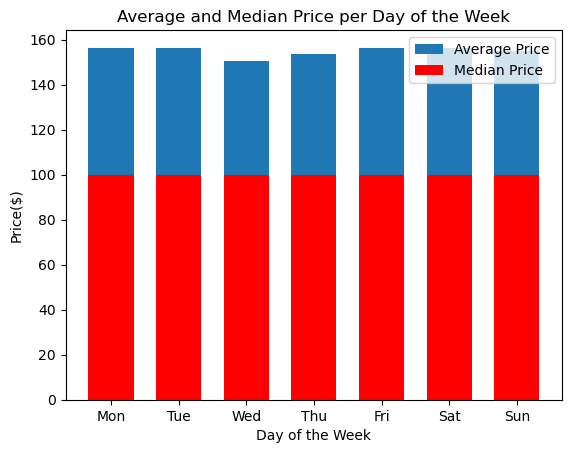

Mon - Average Price: $156.41, Median Price: $100.00
Tue - Average Price: $156.22, Median Price: $100.00
Wed - Average Price: $150.33, Median Price: $100.00
Thu - Average Price: $153.44, Median Price: $100.00
Fri - Average Price: $156.32, Median Price: $100.00
Sat - Average Price: $156.17, Median Price: $100.00
Sun - Average Price: $155.11, Median Price: $100.00


In [3]:
#looking at which day is the most expensive on average and median
daily_avg_price = []
daily_median_price = []
b = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for i in range(7):
    daily_avg_price.append(data[data['weekday'] == i]['price'].mean())
    daily_median_price.append(data[data['weekday'] == i]['price'].median())

plt.bar(range(len(daily_avg_price)), daily_avg_price, width=1 / 1.5, label="Average Price")
plt.bar(range(len(daily_median_price)), daily_median_price, width=1 / 1.5, color='red', label="Median Price")

plt.xticks(range(len(daily_avg_price)), b)
plt.ylabel('Price($)')
plt.xlabel('Day of the Week')
plt.title('Average and Median Price per Day of the Week')
plt.legend()
plt.show()

for i in range(7):
    avg_price = data[data['weekday'] == i]['price'].mean()
    median_price = data[data['weekday'] == i]['price'].median()
    
    daily_avg_price.append(avg_price)
    daily_median_price.append(median_price)

    print(f"{b[i]} - Average Price: ${avg_price:.2f}, Median Price: ${median_price:.2f}")

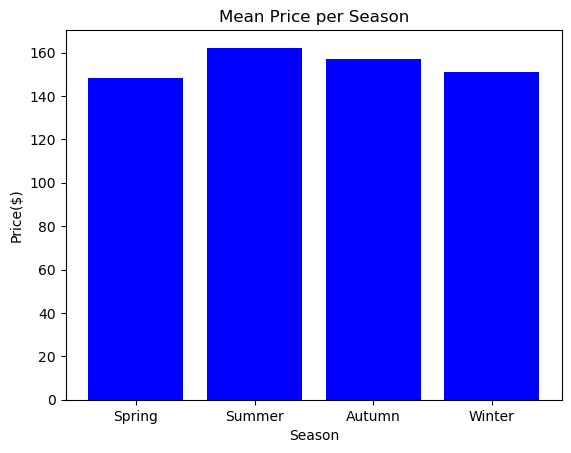

Spring - Mean Price: $148.06
Summer - Mean Price: $162.24
Autumn - Mean Price: $156.99
Winter - Mean Price: $150.87


In [6]:
# Define seasons
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Initialize a list to store mean prices per season
seasonly_mean_price = []

for season in seasons:
    # Calculate mean price for the current season
    mean_price = data[data[f'season_{season}'] == 1]['price'].mean()
    
    # Append mean price to the list
    seasonly_mean_price.append(mean_price)

# Plot bar chart for mean prices per season
plt.bar(range(len(seasons)), seasonly_mean_price, color='blue')
plt.xticks(range(len(seasons)), seasons)
plt.ylabel('Price($)')
plt.xlabel('Season')
plt.title('Mean Price per Season')
plt.show()

# Print mean prices per season
for i, season in enumerate(seasons):
    mean_price = seasonly_mean_price[i]
    print(f"{season} - Mean Price: ${mean_price:.2f}")

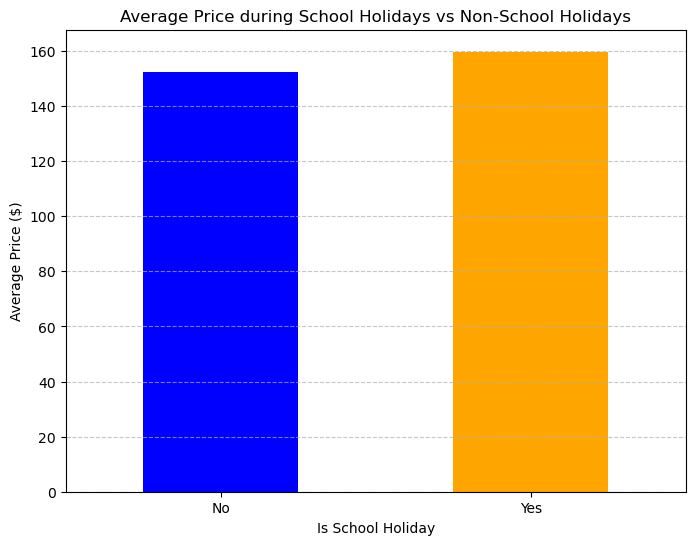

Average Price during School Holidays:
159.69497931270163

Average Price during Non-School Holidays:
152.28619114239496


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# Group by the 'is_school_holiday' column and calculate the average price for each group
average_price_by_school_holiday = data.groupby('is_school_holiday')['price'].mean()

# Plotting the average prices
plt.figure(figsize=(8, 6))
average_price_by_school_holiday.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Price during School Holidays vs Non-School Holidays')
plt.xlabel('Is School Holiday')
plt.ylabel('Average Price ($)')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the average prices for school holidays and non-school holidays
print("Average Price during School Holidays:")
print(average_price_by_school_holiday[True])

print("\nAverage Price during Non-School Holidays:")
print(average_price_by_school_holiday[False])

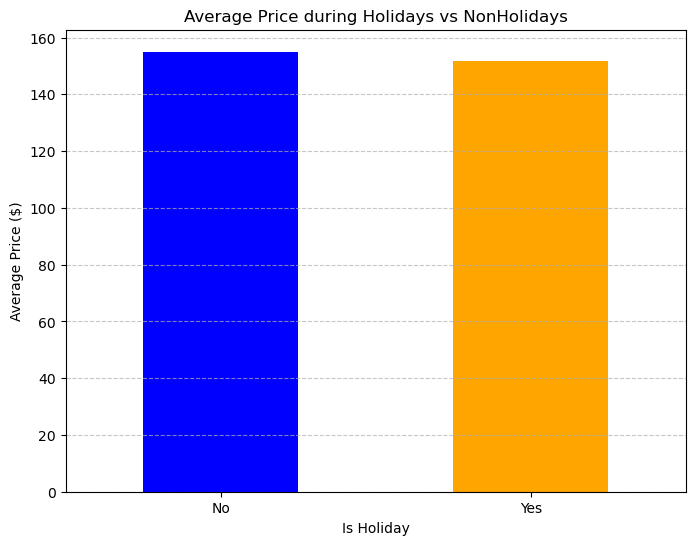

Average Price during Holidays:
151.7190781049936

Average Price during Non Holidays:
155.00335094862174


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# Group by the 'is_school_holiday' column and calculate the average price for each group
average_price_by_school_holiday = data.groupby('is_holiday')['price'].mean()

# Plotting the average prices
plt.figure(figsize=(8, 6))
average_price_by_school_holiday.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Price during Holidays vs NonHolidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Price ($)')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the average prices for school holidays and non-school holidays
print("Average Price during Holidays:")
print(average_price_by_school_holiday[True])

print("\nAverage Price during Non Holidays:")
print(average_price_by_school_holiday[False])